In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from __future__ import print_function
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from snapml import SupportVectorMachine
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from keras.models import Sequential  # Added this line
from keras.layers import Dense
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import make_pipeline  # Added this line
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os  # accessing directory structure
import warnings

warnings.filterwarnings('ignore')


In [2]:
df_credit = pd.read_csv("creditcard.csv")

#  Data Analysis

In [3]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df_credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df_credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
df_credit["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Normal(0) and Frauds(1)

In [8]:
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# Data Visualization 

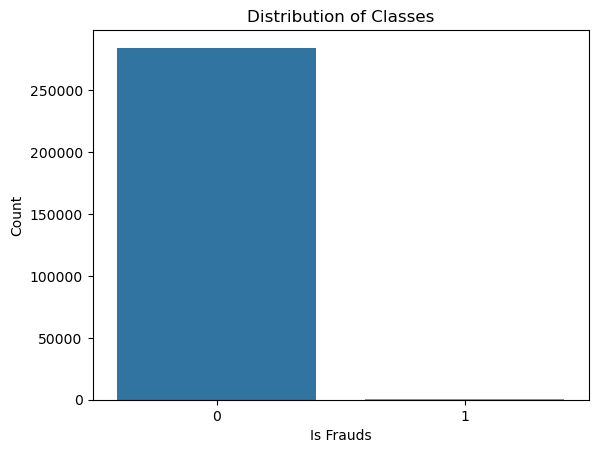

In [9]:
sns.countplot(x='Class', data=df_credit)
plt.title('Distribution of Classes')
plt.xlabel("Is Frauds")
plt.ylabel("Count")
plt.show()

In [10]:
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

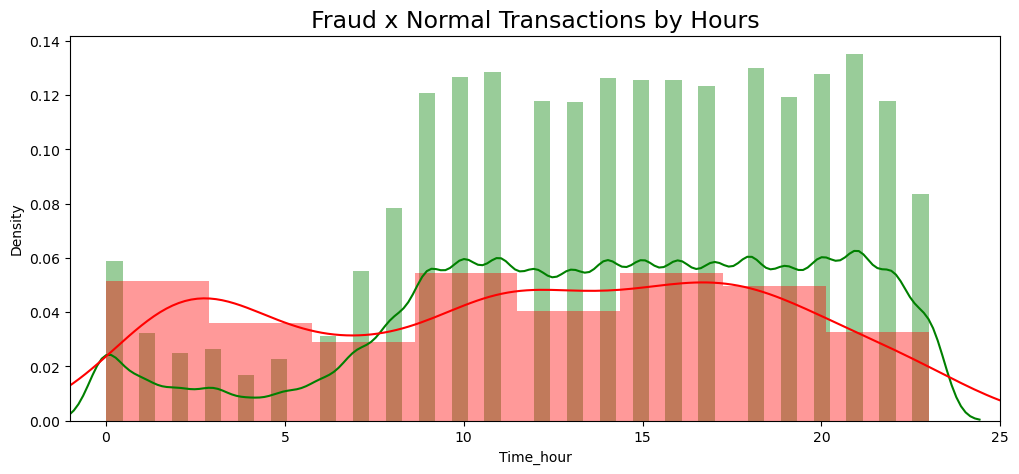

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

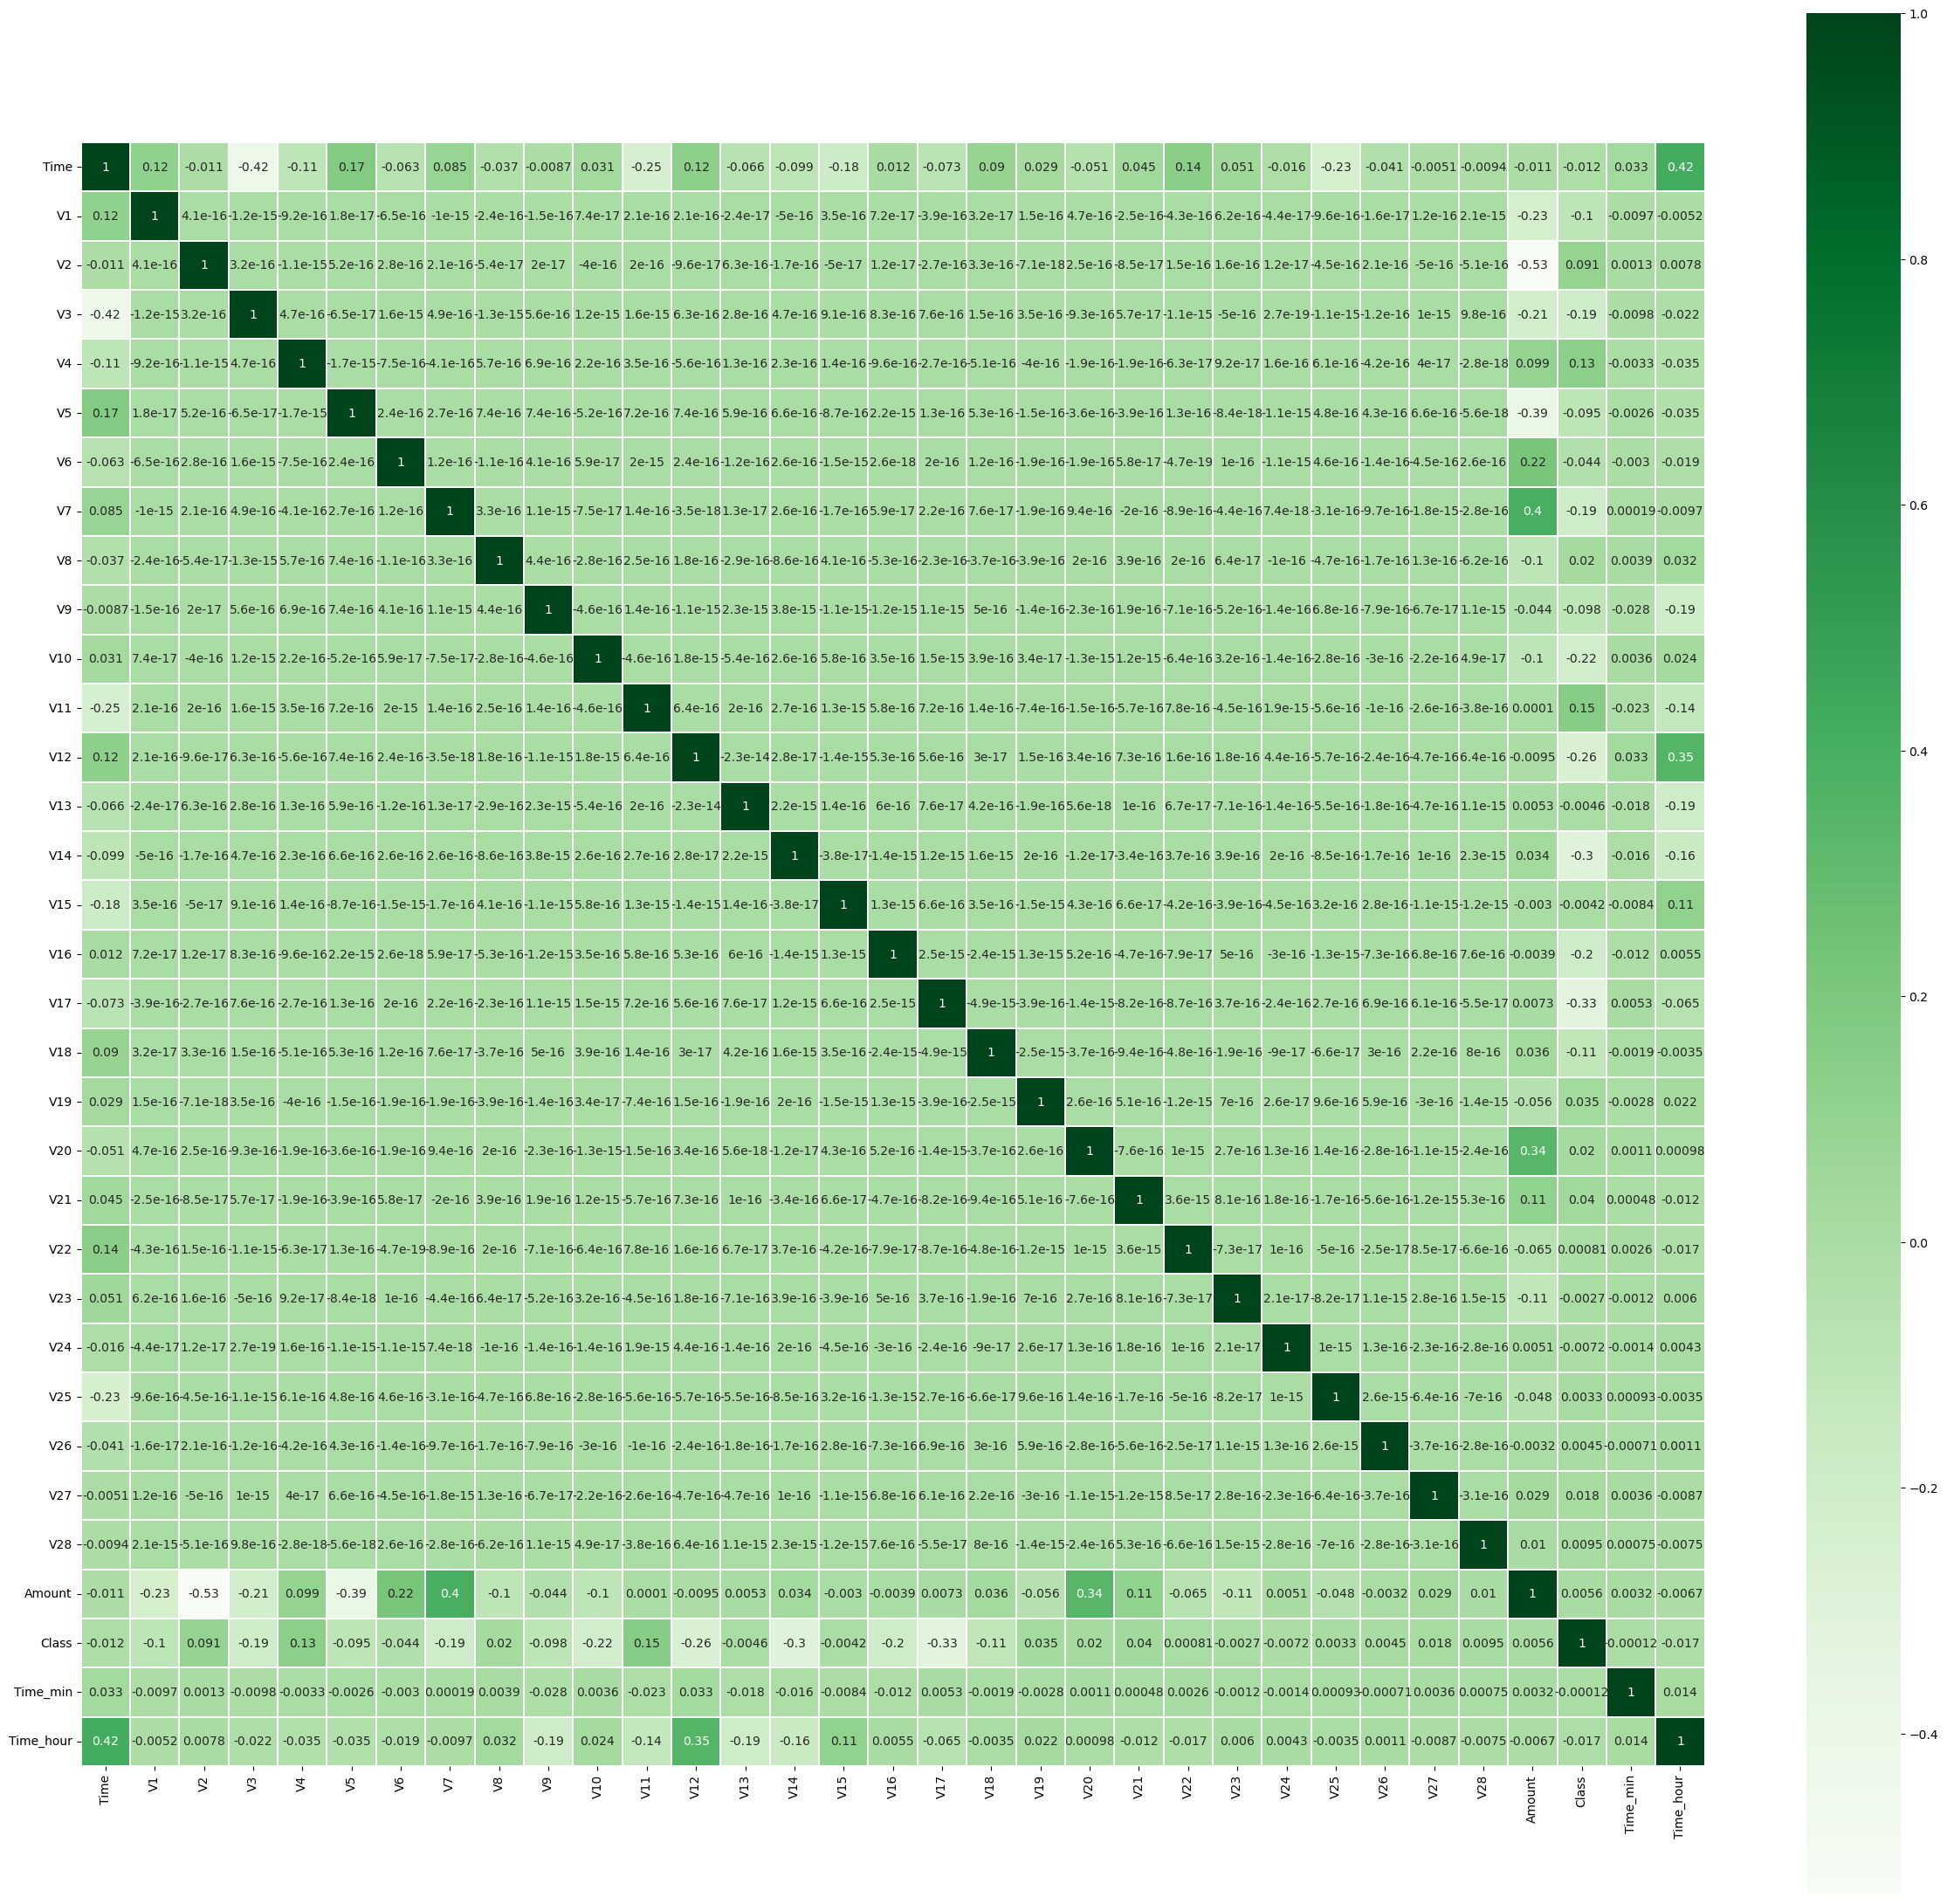

In [12]:
colormap = plt.cm.Greens

plt.figure(figsize=(30,28))

sns.heatmap(df_credit.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

# Data Preprocessing

In [13]:
    df_credit.iloc[:, 1:30] = StandardScaler().fit_transform(df_credit.iloc[:, 1:30])
    data_matrix = df_credit.values
    X = data_matrix[:, 1:30]
    y = data_matrix[:, 30]
    X = normalize(X, norm="l1")
    # print the shape of the features matrix and the labels vector
    print('X.shape=', X.shape, 'y.shape=', y.shape)


X.shape= (284807, 29) y.shape= (284807,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)


X_train.shape= (227845, 29) Y_train.shape= (227845,)
X_test.shape= (56962, 29) Y_test.shape= (56962,)


In [15]:
# Calculate and print the accuracy of the test set
acc_test = round(accuracy_score(y_test, y_test) * 100, 2)
print('Accuracy on the test set: ', acc_test)


Accuracy on the test set:  100.0


# Models

# KMeans

In [23]:
# Convert y_test to integer type
y_test = y_test.astype(int)

# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Train the model
kmeans_model.fit(X_train)

# Predict cluster labels for the test set
test_cluster_labels = kmeans_model.predict(X_test)

# Calculate cluster centers
cluster_centers = kmeans_model.cluster_centers_

# Map each cluster to the most common true label in that cluster
cluster_label_mapping = {i: int(np.argmax(np.bincount(y_test[test_cluster_labels == i]))) for i in range(3)}

# Map predicted cluster labels to true labels
predicted_labels = np.array([cluster_label_mapping[cluster_label] for cluster_label in test_cluster_labels])

# Calculate accuracy-like metric (Note: This is not a standard accuracy metric)
accuracy_like_metric = accuracy_score(y_test, predicted_labels)
print(f"Accuracy-like Metric: {accuracy_like_metric}")


Accuracy-like Metric: 0.9982795547909132


# KMeans HyperPramter

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Assuming X_train and y_train are your training data and labels
# Example: X_train = np.random.rand(100, 2), y_train = np.random.randint(0, 3, 100)

# Define a range of hyperparameter values to try
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Initialize variables to store the best hyperparameters and silhouette score
best_params = None
best_silhouette_score = -1  # Initialize with a value lower than the lowest possible silhouette score

# Iterate over hyperparameter combinations
for params in ParameterGrid(param_grid):
    kmeans_model = KMeans(**params, random_state=42)
    kmeans_model.fit(X_train)
    cluster_labels = kmeans_model.predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    
    # Print the silhouette score for each hyperparameter combination (optional)
    print(f"For n_clusters={params['n_clusters']}, Silhouette Score: {silhouette_avg}")
    
    # Update the best hyperparameters if a higher silhouette score is found
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_params = params

# Train the final model with the best hyperparameters on the entire training set
final_kmeans_model = KMeans(**best_params, random_state=42)
final_kmeans_model.fit(X_train)

# Predict cluster labels for the test set
test_cluster_labels = final_kmeans_model.predict(X_test)

# Calculate cluster centers
cluster_centers = final_kmeans_model.cluster_centers_

# Map each cluster to the most common true label in that cluster
cluster_label_mapping = {i: np.argmax(np.bincount(y_train[test_cluster_labels == i])) for i in range(final_kmeans_model.n_clusters)}

# Map predicted cluster labels to true labels
predicted_labels = np.array([cluster_label_mapping[cluster_label] for cluster_label in test_cluster_labels])

# Calculate accuracy-like metric (Note: This is not a standard accuracy metric)
accuracy_like_metric = accuracy_score(y_test, predicted_labels)
print(f"Accuracy-like Metric: {accuracy_like_metric}")

# Evaluate the final model using silhouette score on the test set
test_silhouette_avg = silhouette_score(X_test, test_cluster_labels)
print(f"Silhouette Score on Test Set: {test_silhouette_avg}")


For n_clusters=2, Silhouette Score: 0.06026834621434265
For n_clusters=3, Silhouette Score: 0.07532669379437684
For n_clusters=4, Silhouette Score: 0.06950943501720439
For n_clusters=5, Silhouette Score: 0.0815549238705089
For n_clusters=6, Silhouette Score: 0.09095755652825227


IndexError: boolean index did not match indexed array along dimension 0; dimension is 227845 but corresponding boolean dimension is 56962